#Import

In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2
!pip install scikeras

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 91.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss, cohen_kappa_score, matthews_corrcoef, roc_auc_score
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Reshape, RepeatVector, TimeDistributed, Conv2D, GRU, MaxPooling2D, LSTM, Dense, Dropout, Input, Reshape, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import seaborn as sns

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

Checking Available GPUs

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Num GPUs Available:  1


#Keras Deep Learning

In [7]:
def create_keras_model(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - accuracy: 0.6243 - loss: 0.6662 - val_accuracy: 0.0000e+00 - val_loss: 55.9668
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6257 - loss: 0.6634 - val_accuracy: 4.9037e-06 - val_loss: 1.0981
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6249 - loss: 0.6637 - val_accuracy: 1.4711e-05 - val_loss: 1.0347
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6252 - loss: 0.6635 - val_accuracy: 0.0000e+00 - val_loss: 0.9093
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6254 - loss: 0.6634 - val_accuracy: 0.0000e+00 - val_loss: 1.0426
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6256 - loss: 0.6633 - val_accuracy: 0.0000e+00 - val_loss: 0.9622
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6255 - loss: 0.6649 - val_accuracy: 4.9037e-06 - val_loss: 8.3437
Epoch 8/10
25491/25491 ━━━━━━━━━━━━━━━━━

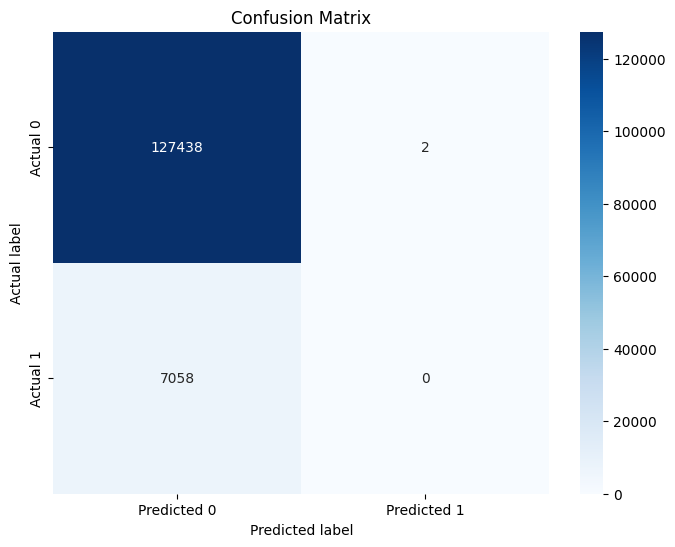

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


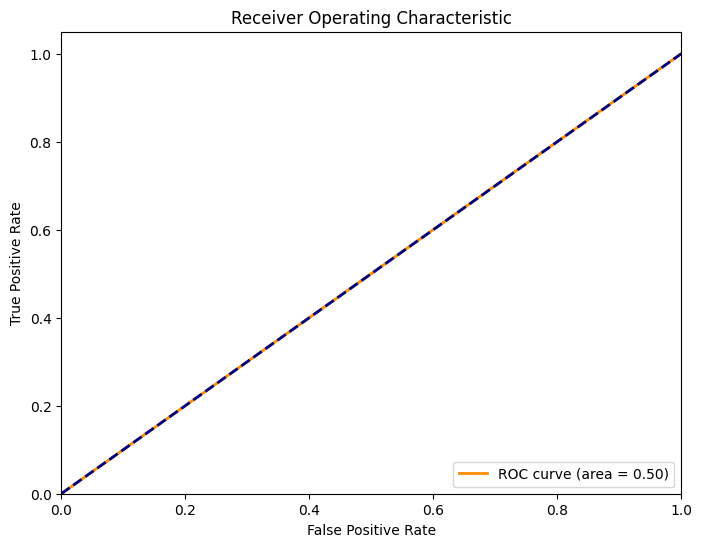

,Metric,Value
0,Accuracy,0.947509
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000016
6,TNR,0.999984
7,FNR,1.000000
8,Youden's J,-0.000016


In [8]:
X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)


input_shape = (X_train_smote1.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_keras)
precision = precision_score(y_test1, y_pred_keras)
recall = recall_score(y_test1, y_pred_keras)
f1 = f1_score(y_test1, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

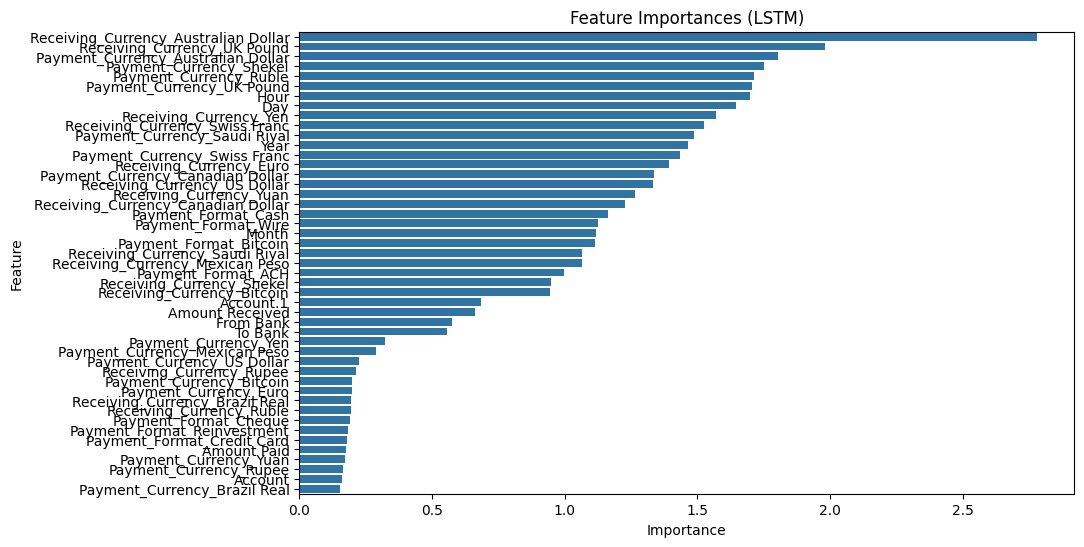

In [9]:
original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.6254 - loss: 0.6699 - val_accuracy: 2.4518e-05 - val_loss: 0.9849
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6244 - loss: 0.6638 - val_accuracy: 1.7653e-04 - val_loss: 1.6928
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6248 - loss: 0.6637 - val_accuracy: 9.3170e-05 - val_loss: 1.8655
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6247 - loss: 0.6636 - val_accuracy: 5.8844e-05 - val_loss: 4.2540
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6251 - loss: 0.6635 - val_accuracy: 2.4518e-05 - val_loss: 0.9850
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6257 - loss: 0.6633 - val_accuracy: 6.8652e-05 - val_loss: 0.9634
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6250 - loss: 0.6701 - val_accuracy: 2.4518e-04 - val_loss: 1.6058
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━

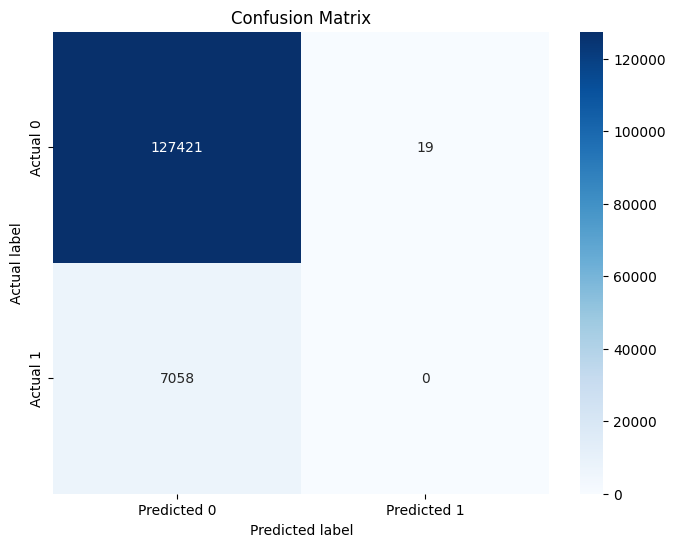

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


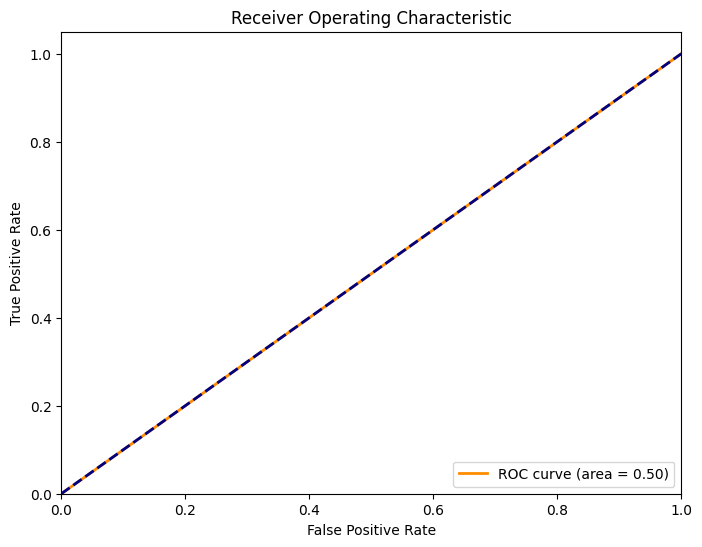

,Metric,Value
0,Accuracy,0.947382
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000149
6,TNR,0.999851
7,FNR,1.000000
8,Youden's J,-0.000149


In [11]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)


input_shape = (X_train_smote1.shape[1],)
model = create_keras_model(input_shape)

model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_keras = (model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_keras)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_keras)
precision = precision_score(y_test1, y_pred_keras)
recall = recall_score(y_test1, y_pred_keras)
f1 = f1_score(y_test1, y_pred_keras)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
metrics_df

In [ ]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Recurrent Neural Networks

In [12]:
def create_rnn_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu', return_sequences=False))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.6234 - loss: 0.6665 - val_accuracy: 3.9230e-05 - val_loss: 8.1480
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6253 - loss: 0.6635 - val_accuracy: 0.0000e+00 - val_loss: 8.0568
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6246 - loss: 0.6637 - val_accuracy: 4.9037e-05 - val_loss: 14.9800
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6248 - loss: 0.6637 - val_accuracy: 2.5009e-04 - val_loss: 22.6320
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6254 - loss: 0.6634 - val_accuracy: 3.9230e-05 - val_loss: 21.2130
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6258 - loss: 0.6631 - val_accuracy: 0.0000e+00 - val_loss: 13.3813
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6243 - loss: 0.6639 - val_accuracy: 2.4518e-05 - val_loss: 10.0951
Epoch 8/10
25491/25491 ━━━━━━━━━━━━━

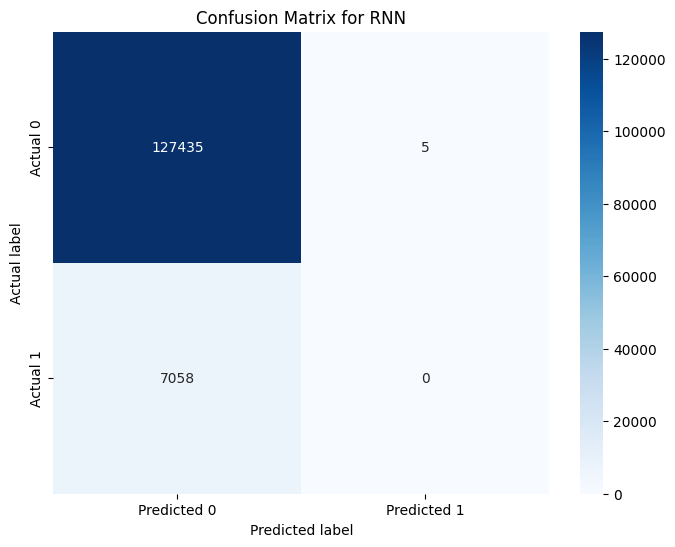

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


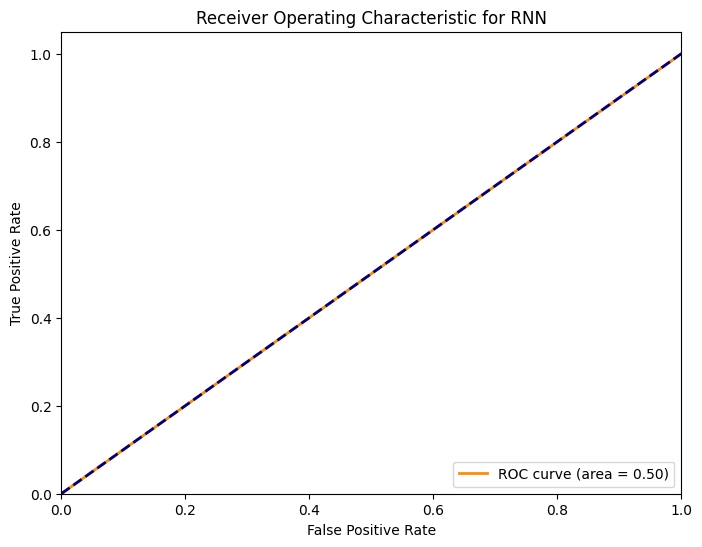

Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.947486
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000039
6,TNR,0.999961
7,FNR,1.000000
8,Youden's J,-0.000039


In [13]:
X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_rnn)
precision = precision_score(y_test1, y_pred_rnn)
recall = recall_score(y_test1, y_pred_rnn)
f1 = f1_score(y_test1, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

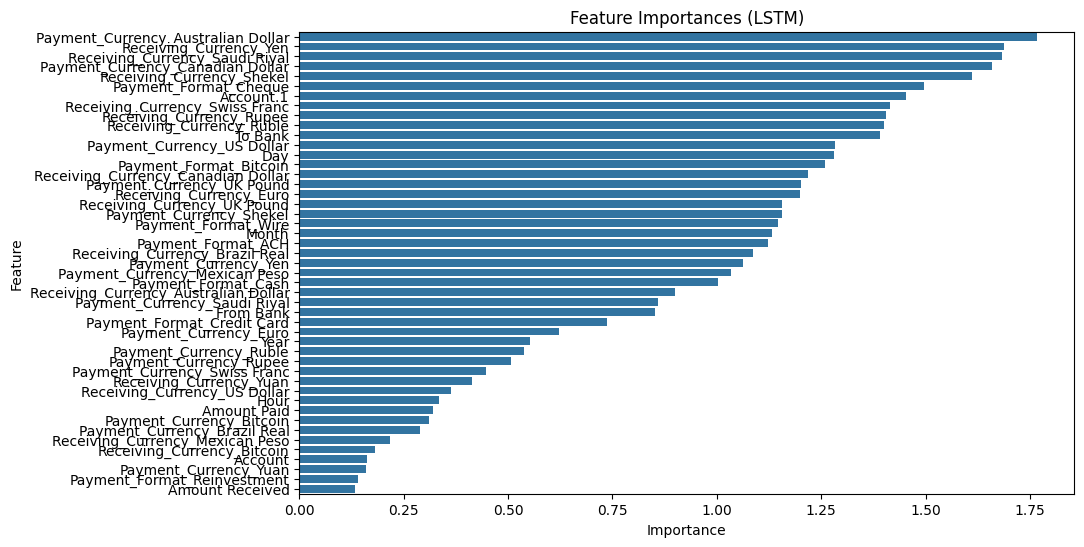

In [14]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.6242 - loss: 0.6649 - val_accuracy: 2.4518e-05 - val_loss: 1.0047
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6254 - loss: 0.6634 - val_accuracy: 0.0011 - val_loss: 0.9877
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6250 - loss: 0.6636 - val_accuracy: 5.2469e-04 - val_loss: 0.9855
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6240 - loss: 0.6641 - val_accuracy: 4.4624e-04 - val_loss: 1.0531
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6242 - loss: 0.6639 - val_accuracy: 0.0000e+00 - val_loss: 1.0405
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6258 - loss: 0.6631 - val_accuracy: 6.3748e-04 - val_loss: 0.9626
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6257 - loss: 0.6632 - val_accuracy: 0.0000e+00 - val_loss: 0.9568
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 4

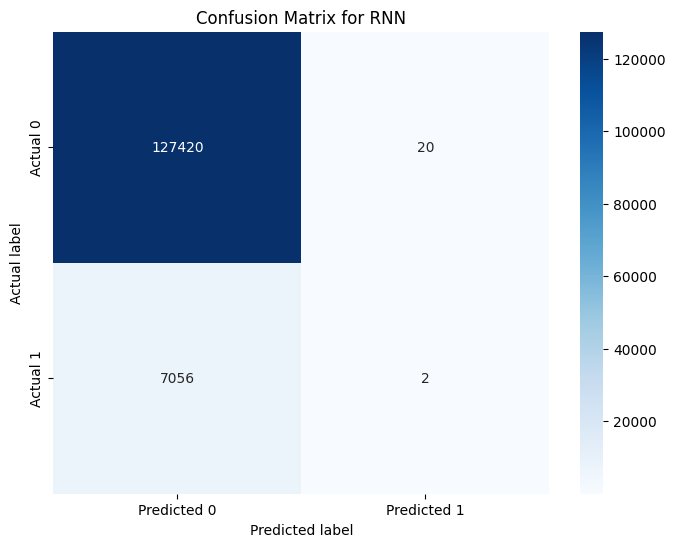

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


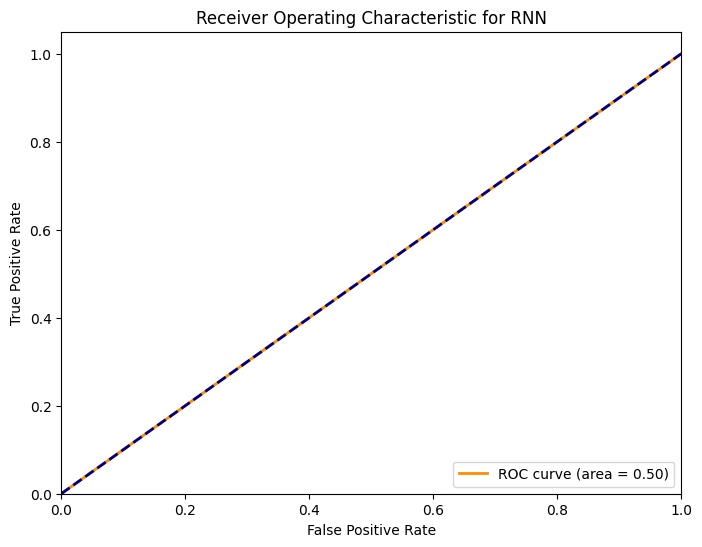

Metrics for RNN Model:


,Metric,Value
0,Accuracy,0.947390
1,Precision,0.090909
2,Recall,0.000283
3,F1-Score,0.000565
4,TPR,0.000283
5,FPR,0.000157
6,TNR,0.999843
7,FNR,0.999717
8,Youden's J,0.000126


In [15]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
rnn_model = create_rnn_model(input_shape)

rnn_model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_rnn = (rnn_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_rnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for RNN')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = rnn_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for RNN')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_rnn)
precision = precision_score(y_test1, y_pred_rnn)
recall = recall_score(y_test1, y_pred_rnn)
f1 = f1_score(y_test1, y_pred_rnn)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for RNN Model:")
metrics_df

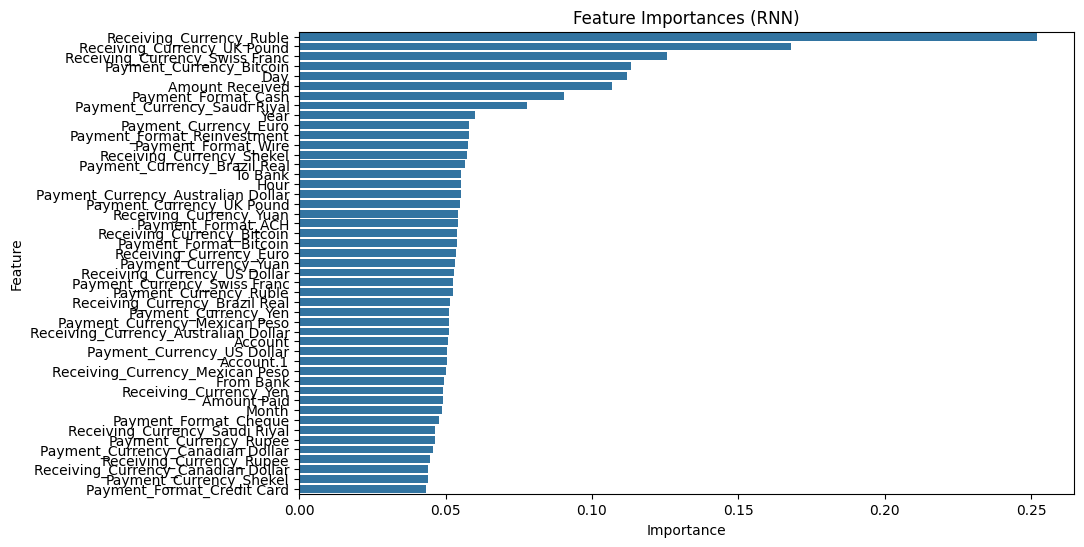

In [16]:
original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = rnn_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (RNN)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Long Short Term Memory

In [7]:
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

###10 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - accuracy: 0.6249 - loss: 0.6643 - val_accuracy: 7.4536e-04 - val_loss: 1.0629
Epoch 2/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 116s 5ms/step - accuracy: 0.6254 - loss: 0.6692 - val_accuracy: 0.0000e+00 - val_loss: 55.7222
Epoch 3/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 117s 5ms/step - accuracy: 0.6256 - loss: 0.6633 - val_accuracy: 0.0000e+00 - val_loss: 255.0003
Epoch 4/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 116s 5ms/step - accuracy: 0.6244 - loss: 0.6639 - val_accuracy: 0.0000e+00 - val_loss: 9.3359
Epoch 5/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 115s 4ms/step - accuracy: 0.6250 - loss: 0.6635 - val_accuracy: 0.0000e+00 - val_loss: 79.7654
Epoch 6/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 115s 4ms/step - accuracy: 0.6253 - loss: 0.6634 - val_accuracy: 0.0000e+00 - val_loss: 200.8818
Epoch 7/10
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 118s 5ms/step - accuracy: 0.6247 - loss: 0.6638 - val_accuracy: 4.9037e-06 - val_loss: 1.1567
Epoch 8/10
25491/25491 ━━━━━

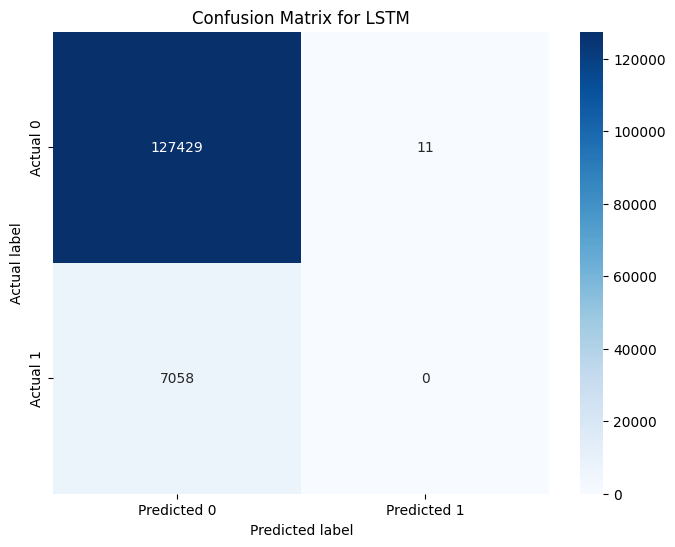

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


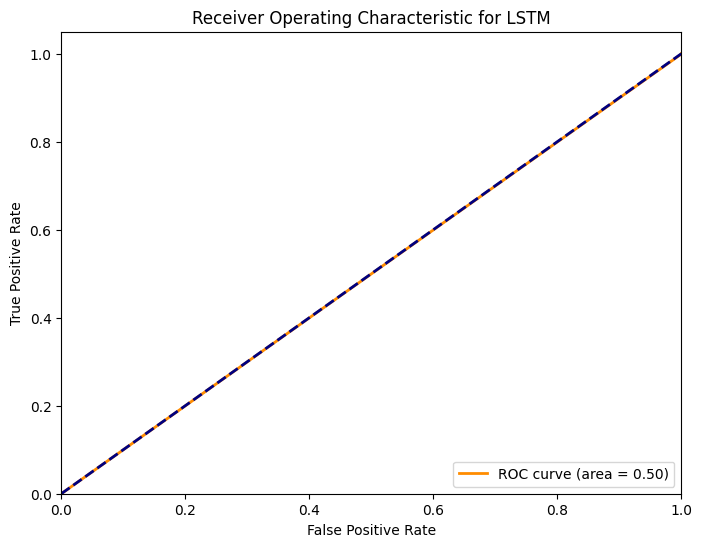

Metrics for LSTM Model:


,Metric,Value
0,Accuracy,0.947442
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000086
6,TNR,0.999914
7,FNR,1.000000
8,Youden's J,-0.000086


In [8]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train_smote1, y_train_smote1, epochs=10, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_lstm)
precision = precision_score(y_test1, y_pred_lstm)
recall = recall_score(y_test1, y_pred_lstm)
f1 = f1_score(y_test1, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

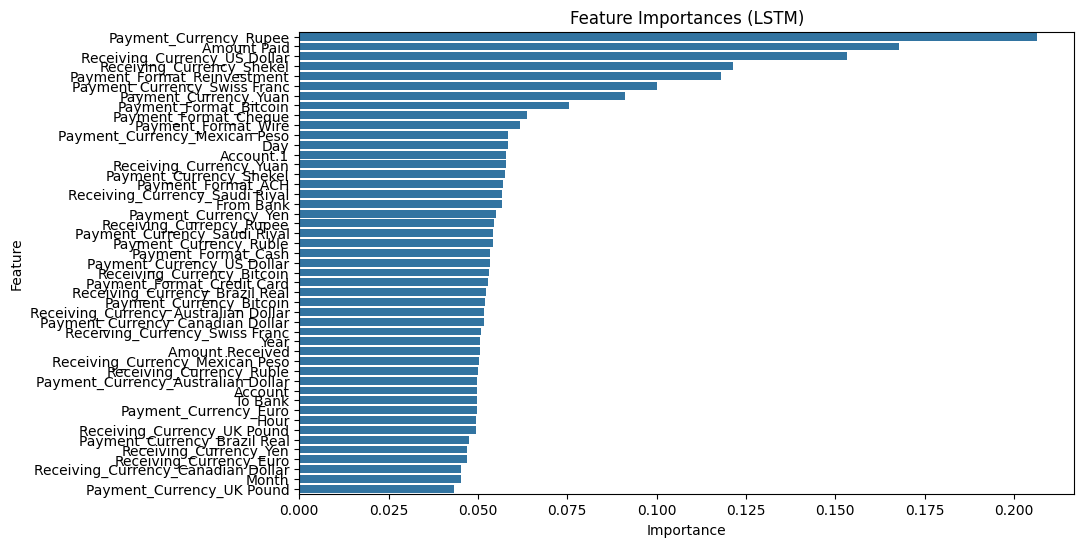

In [10]:
original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = lstm_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###30 Epochs

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.6242 - loss: 0.6654 - val_accuracy: 3.4816e-04 - val_loss: 1.0851
Epoch 2/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6253 - loss: 0.6634 - val_accuracy: 6.1296e-04 - val_loss: 1.0510
Epoch 3/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6252 - loss: 0.6636 - val_accuracy: 0.0000e+00 - val_loss: 1.3821
Epoch 4/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 47s 2ms/step - accuracy: 0.6237 - loss: 0.6642 - val_accuracy: 5.4431e-04 - val_loss: 0.9263
Epoch 5/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.6255 - loss: 0.6637 - val_accuracy: 0.0000e+00 - val_loss: 1.7952
Epoch 6/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.6252 - loss: 0.6636 - val_accuracy: 0.0000e+00 - val_loss: 1.0903
Epoch 7/30
25491/25491 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.6249 - loss: 0.6636 - val_accuracy: 0.0000e+00 - val_loss: 1.5809
Epoch 8/30
25491/25491 ━━━━━━━━━━━━━━━━━━

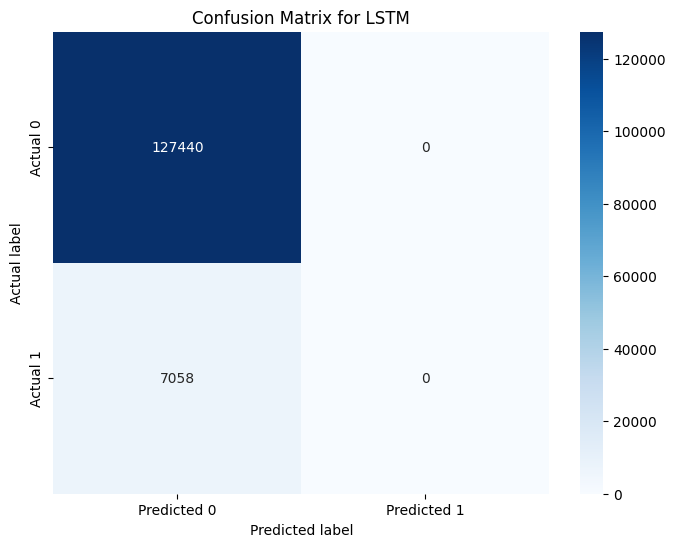

4204/4204 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


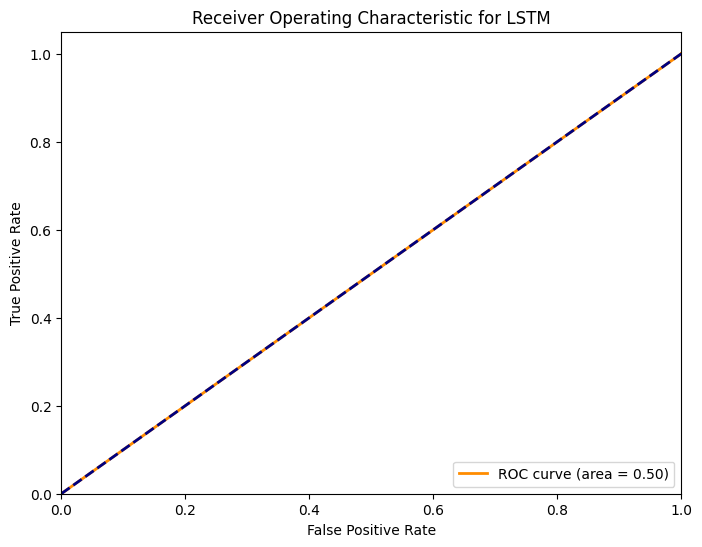

Metrics for LSTM Model:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Metric,Value
0,Accuracy,0.947523
1,Precision,0.000000
2,Recall,0.000000
3,F1-Score,0.000000
4,TPR,0.000000
5,FPR,0.000000
6,TNR,1.000000
7,FNR,1.000000
8,Youden's J,0.000000


In [8]:
X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')
X_test1 = pd.read_csv('/content/drive/MyDrive/X_test1.csv')
y_train_smote1 = pd.read_csv('/content/drive/MyDrive/y_train_smote1.csv')
y_test1 = pd.read_csv('/content/drive/MyDrive/y_test1.csv')

X_train_smote1 = X_train_smote1.values.reshape(X_train_smote1.shape[0], 1, X_train_smote1.shape[1])
X_test1 = X_test1.values.reshape(X_test1.shape[0], 1, X_test1.shape[1])

X_train_smote1 = X_train_smote1.astype(np.float32)
X_test1 = X_test1.astype(np.float32)
y_train_smote1 = y_train_smote1.astype(np.float32)
y_test1 = y_test1.astype(np.float32)

input_shape = (X_train_smote1.shape[1], X_train_smote1.shape[2])
lstm_model = create_lstm_model(input_shape)

lstm_model.fit(X_train_smote1, y_train_smote1, epochs=30, batch_size=32, validation_split=0.2)

y_pred_lstm = (lstm_model.predict(X_test1) > 0.5).astype("int32")

cm = confusion_matrix(y_test1, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for LSTM')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

y_pred_prob = lstm_model.predict(X_test1)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LSTM')
plt.legend(loc="lower right")
plt.show()

accuracy = accuracy_score(y_test1, y_pred_lstm)
precision = precision_score(y_test1, y_pred_lstm)
recall = recall_score(y_test1, y_pred_lstm)
f1 = f1_score(y_test1, y_pred_lstm)
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)
j = tpr - fpr

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'TPR', 'FPR', 'TNR', 'FNR', "Youden's J"],
    'Value': [accuracy, precision, recall, f1, tpr, fpr, tnr, fnr, j]
}
metrics_df = pd.DataFrame(metrics)
print("Metrics for LSTM Model:")
metrics_df

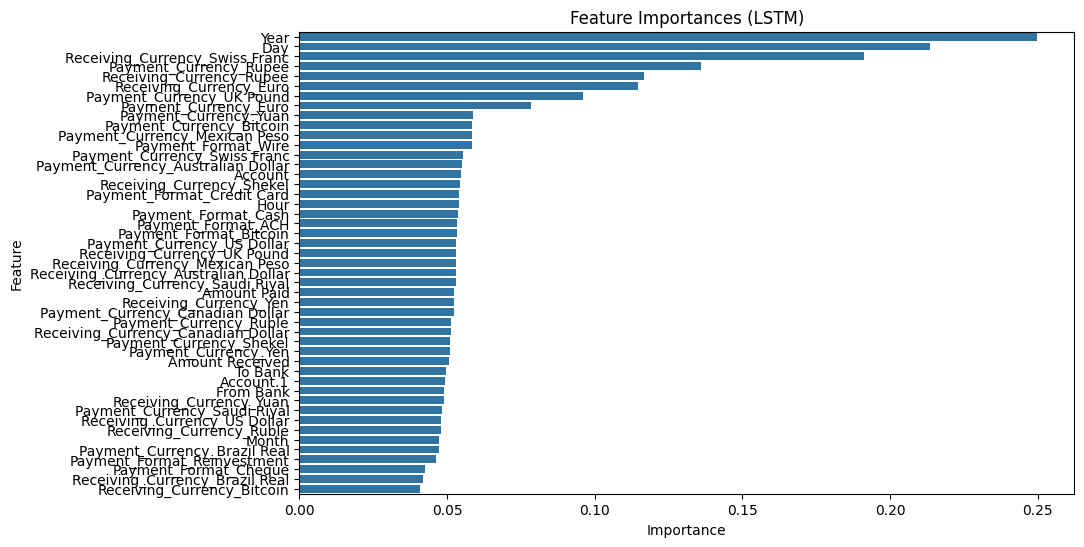

In [11]:
original_X_train_smote1 = pd.read_csv('/content/drive/MyDrive/X_train_smote1.csv')

lstm_weights = lstm_model.layers[0].get_weights()[0]
feature_importances = np.mean(np.abs(lstm_weights), axis=0)

feature_importances = feature_importances[:original_X_train_smote1.shape[1]]

feature_importance_df = pd.DataFrame({'Feature': original_X_train_smote1.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (LSTM)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()